# 🎨 Exploration 13 Main Project : CIFAR-10 이미지 생성하기 🎨

## 🎯 루브릭 살펴보기 🎯

|루브릭 평가항목|세부기준|
|------|---|
|<span style="color:red">**GAN의 생성자, 판별자 구조를 통해 이미지를 생성하는 데 성공함**</span>|오브젝트 종류를 육안으로 구별할 수 있을 만한 이미지가 생성되었을 것|
|<span style="color:blue">**생성 이미지 시각화 및 학습그래프를 통해 GAN 학습이 잘 진행됐음을 증명함**</span>|gif를 통해 생성 이미지 품질이 서서히 향상되며, fake accuracy가 추세적으로 0.5를 향해 하향할 것|
|<span style="color:purple">**추가 GAN 모델구조 혹은 학습과정 개선 아이디어를 제안하고 적용할 수 있음**</span>|제출 아이디어를 제출 프로젝트에 반영하고, 그 결과가 적용 전보다 향상됨을 입증할 것|

## 🎆 프로젝트 순서 🎆

1. 작업환경 구성
2. 라이브러리 import 및 데이터셋 구성
3. 생성자 모델 구현
4. 판별자 모델 구현
5. 손실 함수 구현
6. 최적화 함수 구현
7. 훈련과정 상세 기능 구현
8. 학습 진행
9. 특명 : GAN 훈련 과정 개선 시도
10. 프로젝트 회고

## 1. 작업환경 구성

- 프로젝트를 진행하기 위한 작업환경을 Cloud Shell을 통해 다음과 같이 입력함으로 구성하였다.

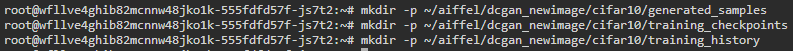

## 2. 라이브러리 import 및 데이터셋 구성

- 우선, 필요한 라이브러리를 import 해준다.
- **CIFAR-10 데이터셋은 tf.keras 안에 있는 datasets에 포함되어 있어서** 데이터셋은 아래 코드를 통해 바로 구성할 수 있다.
- 코드를 동작시켜 보면, **(50000, 32, 32, 3)**이 출력될 것이다.
- **50000은 입력 이미지의 총 개수, 그 다음 두 개의 32는 이미지 픽셀의 가로와 세로, 마지막 3은 RGB 채널 수**를 나타낸다.

In [1]:
## 필요한 라이브러리 import 하기
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

print('라이브러리 import 완료')

라이브러리 import 완료


In [2]:
## CIFAR-10 데이터셋 구성하기
cifar10 = tf.keras.datasets.cifar10
(train_x, _), (test_x, _) = cifar10.load_data()

train_x.shape

(50000, 32, 32, 3)

- 이미지 픽셀의 최대/최솟값을 알아본다.

In [3]:
print("픽셀의 최댓값 :", train_x.max())
print("픽셀의 최솟값 :", train_x.min())

픽셀의 최댓값 : 255
픽셀의 최솟값 : 0


- 정규화 하기 이전의 train image를 확인해 본다.
- 잠재된 개발자는 7을 좋아한다. 이에 7번째 데이터를 확인해 본다. (**index=6**)

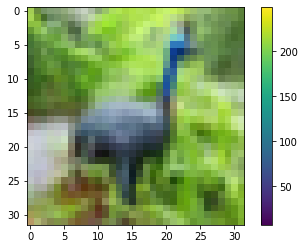

In [4]:
plt.imshow(train_x[6].reshape(32, 32, 3))
plt.colorbar()
plt.show()

- 학습에 사용할 train_x 의 이미지를 **[-1, 1]로 정규화**해준다.
- 정규화 과정에서 **중간값을 0으로 맞추기 위해** 127.5를 train_x에서 뺀 결과를 다시 127.5로 나눈다.

In [5]:
train_x = (train_x - 127.5) / 127.5 # 이미지를 [-1, 1]로 정규화합니다.

print("정규화된 픽셀의 최댓값 :", train_x.max())
print("정규화된 픽셀의 최솟값 :", train_x.min())

정규화된 픽셀의 최댓값 : 1.0
정규화된 픽셀의 최솟값 : -1.0


- 이쯤에서 다시 한 번 데이터셋의 형상을 확인해 보자.
- CIFAR-10 데이터셋은 grayscale 이미지가 아닌 **RGB 컬러 이미지**이므로 채널 수 3이 잘 적용되어 있다.

In [6]:
train_x.shape

(50000, 32, 32, 3)

- 이번에도 train_x의 7번째 데이터를 불러와서 어떻게 생겼는지 확인해 본다.
- **plt.colorbar()** 메서드를 이용해 오른쪽에 있는 각 픽셀의 값과 그에 따른 색을 확인할 수 있다.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


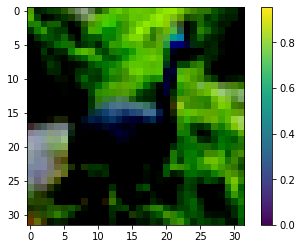

In [7]:
plt.imshow(train_x[6].reshape(32, 32, 3))
plt.colorbar()
plt.show()

- **for 문과 subplot을 활용**하여 10개 정도의 이미지를 한 번에 나타내어 본다.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

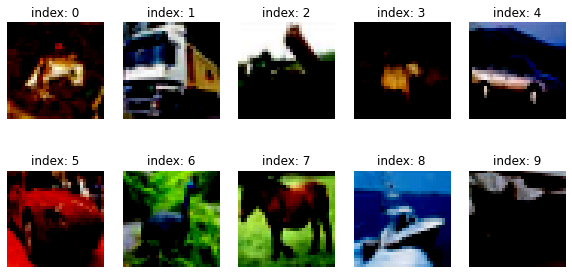

In [8]:
plt.figure(figsize=(10, 5))   # 이미지 전체 프레임의 크기 결정

for i in range(10):
    plt.subplot(2, 5, i+1)   # 여러 개의 이미지를 한 번에 띄우는 방법
    plt.imshow(train_x[i].reshape(32, 32, 3))
    plt.title(f'index: {i}')   # 각 이미지에 제목으로 index 값을 삽입
    plt.axis('off')   # 불필요한 축을 제거하고 깔끔하게 나타내는 방법
plt.show()

- **(연습)** for 문을 활용하여 이미지 8개를 2×4의 배열로 띄우고, 모든 이미지는 train_x에서 랜덤으로 추출하도록 할 수도 있다.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


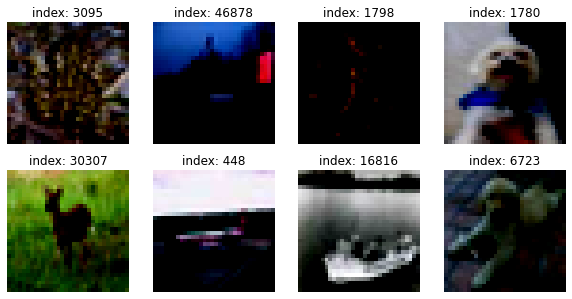

In [9]:
plt.figure(figsize=(10, 5))

for i in range(8):
    plt.subplot(2, 4, i+1)
    random_index = np.random.randint(1, 50000)
    plt.imshow(train_x[random_index].reshape(32, 32, 3))
    plt.title(f'index: {random_index}')
    plt.axis('off')
plt.show()

- 위 전처리 과정으로 정리된 데이터를 **모델에 넣어서 학습하는 데 사용**할 것이다.
- 편리한 사용을 위해 **Tensorflow의 dataset을 준비**해 놓는다.
- dataset을 준비해 두면, 우리가 모델에게 직접 섞어서 넣어주지 않아도 될 것이다.
- **BUFFER_SIZE** 는 CIFAR-10의 전체 데이터 수인 50,000으로 설정해준다.
- **BATCH_SIZE** 는 메모리 활용 및 학습 시간의 효율성을 고려해 적절히 설정해준다. 이 방식을 **미니배치 학습**이라고 한다.

In [10]:
BUFFER_SIZE = 50000
BATCH_SIZE = 256

- tf.data.Dataset 모듈의 **from_tensor_slices()** 함수를 사용하면 리스트, 넘파이, 또는 텐서플로우의 텐서 자료형에서 데이터셋을 만들 수 있다.
- 데이터가 잘 섞이게 되려면 BUFFER_SIZE 값이 총 데이터의 사이즈와 같거나, 혹은 크게 설정하는 것이 좋다.

In [11]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

## 3. 생성자 모델 구현

- 생성자는 **Generator**라고 부른다.
- 의미가 없는 Random한 노이즈로부터 신경망에서의 연산을 통해 이미지 형상의 벡터를 생성해 낸다.
- **make_generator_model()** 함수를 만들어서 생성자를 언제든지 생성할 수 있게 한다.
- **tf.keras.Sequential()** 로 모델을 시작해서 레이어를 한층 한층 쌓아나간다.
- **Conv2DTranspose** 층은 일반적인 Conv2D와 반대로 이미지 사이즈를 넓히는 역할을 한다. (Conv2D는 이미지 사이즈를 줄이는 역할을 한다.)
- 아래 정의된 모델은 총 4번의 Conv2DTranspose 층을 통과하는 모델이다.
- **(4, 4, 256)** → (8, 8, 128) → (16, 16, 128) → (32, 32, 128) → **(32, 32, 3)**
- 최종 사이즈인 (32, 32, 3)은 **준비했던 데이터셋의 형상과 같게** 하는 것이 좋다.
- 중간 층의 활성화 함수로는 LeakyReLU를 사용하였다.
- 마지막 여섯 번째 층에서 활성화 함수로 tanh를 주는 이유는 tanh 값의 범위가 [-1, 1]임을 이용하여 **정규화 데이터셋과 동일하게 맞추기 위함이다.**

In [12]:
def make_generator_model():
    
    # Start
    model = tf.keras.Sequential()
    
    # First: Dense layer
    model.add(layers.Dense(4*4*256, input_shape=(100,))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # Second: Reshape layer
    model.add(layers.Reshape((4, 4, 256)))
    
    # Third: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # Sixth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(3, (3, 3), activation='tanh', padding='same'))
    return model

SyntaxError: invalid syntax (<ipython-input-12-e6208bb02bd8>, line 8)

- 우선 여기까지 생성한 모델을 generator에 담고, 모델의 세부 내용을 출력해 보자.

In [ ]:
generator = make_generator_model()
generator.summary()

- shape(1, 100)의 형상을 가지는 Random Noise 벡터를 생성해본다.
- **tf.random.normal**을 이용하면 가우시안 분포에서 뽑아낸 랜덤 벡터로 이루어진 Noise 벡터를 만들 수 있다.

In [ ]:
noise = tf.random.normal([1, 100])

- 이제, 생성자 모델에 noise를 입력 값으로 넣고 결과를 도출해 보자.
- 아직 모델을 학습하지 않은 상태이므로, **training=False** 를 부여하여야 바른 결과를 도출할 수 있다.
- 출력해 보면, 텐서 형태의 [1, 32, 32, 3] 사이즈의 이미지가 잘 생성된 것을 알 수 있다.
- 아래 결과에서 첫 번째 1은 **배치 사이즈**를 의미한다.

In [ ]:
generated_image = generator(noise, training=False)
generated_image.shape

- **matplotlib 라이브러리는 안타깝게도 2차원 이미지만 보여줄 수 있다.. 😭😭**
- 눈물을 머금고.. 0, 3번째 축의 index를 0으로 설정하여 32×32 형상의 이미지를 꺼낼 수 있게 한다.
- 출력해 본 결과에 의하여 **[-1, 1] 사이에서 이미지가 적당히 잘 생성되었음을 확인**할 수 있었다.
- 아직 모델을 전혀 학습하지 않은 상태라서 제대로 된 이미지 대신 노이즈 같은 이미지가 생성되었다.
- 나중에 모델 학습을 통해 제대로 된 이미지가 생성되게 할 것이다.

In [ ]:
plt.imshow(generated_image[0, :, :, 0])
plt.colorbar()
plt.show()

## 4. 판별자 모델 구현

- 판별자는 **Discriminator**라고 부른다.
- 기존에 있던 진짜 이미지와 생성자가 만들어낸 이미지를 입력받아 각 이미지가 Real인지, Fake인지에 대한 판단 정도를 float 값으로 출력한다.
- **입력은 (32, 32, 3)의 이미지**이고 **출력은 진짜라고 판단한 정도를 나타낸 하나의 실수값**이다.
- 판별자 모델에서는 생성자 모델과는 달리 **Conv2D**를 사용하였다.
- 이전 생성자 모델 구현에서도 언급했듯이 Conv2D는 **이미지의 사이즈를 줄이는 역할**을 한다.
- (32, 32, 3) → (16, 16, 64) → (8, 8, 128) → (4, 4, 128) → (2, 2, 256) → flatten layer → dense layer
- **flatten layer**는 3차원의 이미지를 1차원으로 펼친 벡터로 변환하는 역할을 한다.
- 변환한 벡터는 마지막 dense layer를 거쳐 단 하나의 실수값으로 출력된다.

In [ ]:
def make_discriminator_model():
    
    # Start
    model = tf.keras.Sequential()
    
    # First: Conv2D Layer
    model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # Second: Conv2D Layer
    model.add(layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # Third: Conv2D Layer
    model.add(layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # Fourth: Conv2D Layer
    model.add(layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # Fifth: Flatten Layer
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.1))
    
    # Sixth: Dense Layer
    model.add(layers.Dense(1))
    return model

- 여기까지 생성한 모델을 discriminator에 담고, 모델의 세부 내용을 출력해 보자.

In [ ]:
discriminator = make_discriminator_model()
discriminator.summary()

- 아까 전 generated_image를 다시 불러와서 판별자에 입력시켜본다.
- **Tensorflow의 Tensor의 형태**로 출력된다.

In [ ]:
decision = discriminator(generated_image, training=False)
decision

## 5. 손실 함수 구현

- 이제부터 이미지 생성 모델이 똑똑해지기 위해 필요한 것들을 준비한다.
- 딥러닝 모델이 학습하기 위해서는 **loss function**과 **optimizer**가 꼭 필요하다.
- 이번 스텝에서는 손실 함수를, 다음 6번 스텝에서는 최적화 함수를 구현하게 될 것이다.
- GAN 모델은 손실 함수로 **교차 엔트로피(Cross Entropy)**를 사용한다.
- 교차 엔트로피는 분류 모델을 설계할 때 사용하는 손실 함수이다.
- 판별자는 생성자가 생성한 진짜 이미지는 진짜로, 가짜는 가짜로 잘 판별해내야 한다.
- 진짜, 가짜의 2가지 클래스로 분류하는 문제이므로, **이진 교차 엔트로피(binary cross entropy)**를 사용하게 된다.
- 손실 함수에 사용할 교차 엔트로피 함수는 **tf.keras.losses** 라이브러리 안에 있다.
- **from_logits=True** 로 설정해야 BinaryCrossentropy에 입력된 값을 함수 내부에서 sigmoid 함수를 사용해 0~1 사이의 값으로 정규화한 후 알맞게 계산해낼 수 있다.

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

- cross_entropy를 활용해 계산할 loss는 fake_output와 real_output를 활용하게 된다.
- **fake_output** : 생성자가 생성한 Fake 이미지를 구분자에 입력시켜서 판별된 값
- **real_output** : 기존의 Real 이미지를 구분자에 입력시켜서 판별된 값
- **tf.ones_like(), tf.zeros_like()** 는 특정 벡터와 동일한 크기이면서 값은 1 또는 0으로 가득 찬 벡터를 만들 때 사용한다.

- **generator_loss** 함수를 정의한다.
- 생성자는 자신이 생성한 Fake 이미지를 판별자가 진짜로 판단하도록 속인다.
- 판별자는 생성자가 생성한 가짜 이미지를 가짜로, 진짜 이미지를 진짜로 잘 판별해내도록 한다.
- Real 이미지 라벨을 1, Fake 이미지 라벨을 0이라고 할 때, **생성자 입장에서 fake_output는 1에 가까워지기를 원한다.**
- **tf.ones_like**를 활용해 교차 엔트로피 값을 계산한다.

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

- **discriminator_loss** 함수를 정의한다.
- **판별자 입장에서 real_output는 1, fake_output는 0에 가까워지기를 원한다.**
- 교차 엔트로피에 기반하여 위 2가지 loss를 모두 계산하여 둘을 더한 값이 discriminator_loss의 최종 값이 된다.

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

- **discriminator_accuracy** 함수를 정의한다.
- 판별자의 real_output와 fake_output을 얼마나 정확히 판별하는지에 대하여 **accuracy를 계산**하는 것이 GAN 학습에서 매우 중요하다.
- 판별자가 accuracy가 1에 가까울 정도로 정확히 판별해 낸다면 좋다고 생각할 수 있겠지만, **그렇지 않다!**
- 그 이유는 생성자가 만들어내는 fake_output이 real_output와 많은 차이를 보이기 때문에 판별자가 매우 쉽게 판별하기 때문이다.
- real_accuracy와 fake_accuracy가 처음에는 1에 가깝게 나오다가, epoch를 거치면서 둘 다 **0.5에 가까워지는 것**이 이상적인 학습이 된다.

In [ ]:
def discriminator_accuracy(real_output, fake_output):
    
    ## [함수 풀이 순서]
    # (1) tf.math.greater_equal(real_output, tf.constant(0.5) : real_output의 각 원소가 0.5 이상인지 Bool 값으로 판별
    # (2) tf.cast((1), tf.float32) : 앞의 결과가 True이면 1.0을 출력하고 False이면 0.0을 출력
    # (3) tf.reduce_mean((2)) : 여기까지 수행한 결과를 평균하여 이번 배치의 accuracy를 계산
    
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

## 6. 최적화 함수 구현

- 우리가 딥러닝에서 사용하는 최적화 함수에는 SGD, Momentum, AdaGrad, Adam 등이 있다.
- SGD는 여러 가지 문제점으로 인해 최적화 함수로는 사용하지 않는다.
- 여기서는 **Adam**을 사용할 것이다. Adam은 Momentum과 AdaGrad의 이점을 조합하여 만들어진 기법이다.
- Adam은 tf.keras.optimizers 안에 있다.
- 생성자와 구분자는 각각 따로따로 학습을 진행하는 **개별 네트워크**이다. 따라서 optimizer도 따로따로 만들어준다.

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

- 매번 학습 진행 상황을 확인하기 위해 생성자가 생성한 샘플을 확인할 것이다.
- **생성할 샘플은 매번 같은 노이즈로 생성**해야 그에 대한 진전 과정을 확인할 수 있다. 이에 고정된 seed 노이즈를 만들어둔다.

In [ ]:
noise_dim = 100   # noise의 차원 수
num_examples_to_generate = 16   # 한 번에 샘플 16장 생성

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

## 7. 훈련과정 상세 기능 구현

- 1개의 미니배치 당 진행할 **train_step** 함수를 정의한다.
- 현재 사용하는 Tensorflow 버전을 먼저 확인해 보자.

In [ ]:
tf.__version__

- 출력해 보면 Tensorflow의 버전이 2.0 이상임을 알 수 있다.
- Tensorflow 2.0 이상에서는 이전 버전과는 달리 session을 사용하지 않는다.
- 학습시킬 훈련 함수 위에 **@tf.function**이라는 데코레이터를 붙여서 사용하도록 할 것이다!
- 데코레이터를 통해 우리가 직접 session을 열어 학습하고 끝나면 다시 닫아주는 등의 과정을 내부적으로 처리해서 편리한 학습을 도모한다.
- 데코레이터가 사용된 함수에 입력된 입력은 Tensorflow의 graph 노드가 될 수 있는 타입으로 자동으로 변환된다.

In [ ]:
@tf.function
def train_step(images):  # (1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  # (2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  # (3) tf.GradientTape() 오픈
        generated_images = generator(noise, training=True)  # (4) generated_images 생성

        # (5) discriminator 판별
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        # (6) loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        # (7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    # (8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    # (9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  # (10) 리턴값

- **train_step 함수에 속한 내용들을 알아보자.**
1. **입력데이터** : Real 이미지 역할을 할 images 한 세트를 입력으로 받는다.
2. **생성자 입력 noise** : 생성자가 Fake 이미지를 생성하기 위한 noise를 images 한 세트와 동일한 크기의 BATCH_SIZE 만큼 생성한다.
3. **tf.GradientTape()** : 가중치 갱신을 위한 Gradient를 자동 미분으로 계산하기 위해 with 구문을 활용한다.
4. **generated_images 생성** : 생성자가 noise를 입력받은 후 generated_images를 생성한다.
5. **discriminator 판별** : 판별자가 Real 이미지인 images와 Fake 이미지인 generated_images를 각각 입력받아서 real_output, fake_output를 출력한다.
6. **loss 계산** : fake_output, real_output을 이용하여 생성자와 판별자 각각의 loss를 계산한다.
7. **accuracy 계산** : fake_output, real_output을 이용하여 판별자의 판별 정확도를 계산한다.
8. **gradient 계산** : gen_tape와 disc_tape를 이용하여 gradient를 자동으로 계산하도록 한다.
9. **모델 학습** : 계산된 gradient를 optimizer에 입력하여 가중치를 갱신한다.
10. **리턴값** : 위의 과정을 통해 계산된 loss와 accuracy를 리턴한다.

- 이 과정이 한 번의 train_step 과정이다. 굉장히 오래 걸릴 거 같지 않을까? 😑

- 이처럼 한 단계씩 학습할 train_step과 함께 **일정 간격으로 학습 현황을 볼 수 있는 샘플을 생성하는 함수를 정의한다.**
- 앞에서 만들어 두었던 **고정된 seed를 이용해서 결과물을 만들어내므로**, 고정된 seed에 대한 결과물의 진전 과정을 살펴볼 수 있다.
- 모델이 16개의 seed가 들어 있는 sample_seeds를 입력받아서 만들어 낸 prediction을 matplotlib으로 시각화해주는 과정이 담겨 있다.
- subplot을 이용해서 4행 4열로 나누어 총 16개의 샘플을 시각화한다.
- plt에 저장되어 보여지는 이미지를 **plt.savefig**를 이용하여 파일화해서 저장한다.

In [ ]:
def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        # plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5)
        plt.imshow(predictions[i])
        plt.axis('off')

    plt.savefig('{}/aiffel/dcgan_newimage/cifar10/generated_samples2/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

- 학습 과정을 체크하기 위해 시각화해 볼 중요한 두 가지는 **loss, accuracy 그래프**이다.
- GAN의 학습 과정은 지도학습 모델보다 까다로운데, 그 이유는 **두 모델이 서로의 학습 과정에 영향을 주고받기 때문이다.**
- train_step() 함수가 리턴하는 4가지 값 gen_loss, disc_loss, real_accuracy, fake_accuracy를 history라는 딕셔너리 구조에 리스트로 저장하고 있다가, 매 epoch마다 시각화하는 함수를 정의한다.

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])     # 생성자의 loss의 history는 history['gen_loss']로 접근할 수 있는 list로 관리
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    # training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장합니다.
    plt.savefig('{}/aiffel/dcgan_newimage/cifar10/training_history2/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

- 마지막으로 정기적으로 모델을 저장하기 위한 **checkpoint**를 만들 것이다.
- GAN의 학습 과정은 지도학습 모델보다 까다롭다고 앞에서 언급했었다. 이처럼 모델이 복잡하고 학습 속도가 오래 걸리는 모델에 대해서는 **저장 및 버전 관리가 중요한 요소가 된다.**
- tf.train.checkpoint를 활용하여 빠르고 편하게 버전 관리를 할 수 있다.
- checkpoint에는 optimizer와 생성자, 판별자(구분자)를 모두 넣어서 저장한다.
- 생성자와 판별자가 학습한 모델의 가중치를 저장한다.
- checkpoint 모델을 저장하기 위해 **AIFFEL 클라우드 작업환경 내에 있는 training_checkpoints 라는 디렉토리를 사용한다.**

In [ ]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints2'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

## 8. 학습 진행

- 지금까지 얻은 데이터를 가지고 학습을 진행한다.
- 지금까지 한 단계를 학습하는 **train_step**, 샘플 이미지를 생성하고 저장하기 위한 **generate_and_save_images()**, 학습 과정을 시각화하는 **draw_train_history()**, 그리고 모델까지 저장하기 위한 **checkpoint**를 **train이라는 하나의 함수에 녹인다!**

In [ ]:
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

- 이제 모델을 저장하는 간격을 담당하는 **save_every**와 학습의 횟수를 결정하는 **EPOCHS** 파라미터를 설정해주고 직접 훈련시켜 본다.
- **이미지 기반 학습**이기 때문에 CPU 환경에서 다소 시간이 소요될 수 있을 것이다.
- 이에 사용 가능한 GPU의 디바이스까지 함께 확인하도록 한다.

In [ ]:
save_every = 10
EPOCHS = 100

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")

- 이제 모든 준비를 완료했으니 GAN을 학습 시켜 본다. (**CPU/GPU 등의 환경에 따라 소요시간에 차이가 있을 수 있음!!!**)

In [ ]:
%%time
train(train_dataset, EPOCHS, save_every)

# 학습과정의 loss, accuracy 그래프 이미지 파일이 ~/aiffel/dcgan_newimage/cifar10/training_history 경로에 생성되고 있으니
# 진행 과정을 수시로 확인해 보시길 권합니다.

- **여기까지 오느라 대단히 고생했다!!!** 😋😋😋
- 이제, 학습과정을 시각화하는 것에 대해 살펴본다.
- 우선, 그동안의 생성된 샘플 이미지들을 합쳐 GIF 움짤로 만들어 본다.
- 이를 통해, 학습 진행 흐름을 확인해 볼 수 있다.
- GIF 파일은 **imageio** 라이브러리를 활용해서 만들 수 있다.
- **imageio.get_writer**를 활용해서 파일을 열고, 거기에 **append_data**로 이미지를 하나씩 붙여나가는 방식이다.

In [ ]:
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/cifar10_dcgan2.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/cifar10/generated_samples2/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/cifar10/cifar10_dcgan.gif

- **checkpoint 기법**을 활용해 모델을 로드하고 학습 시간을 효율화한다.
- 아직까지는 사진이 많이 흐릿..하네요 ㅠㅠ 😥😥

In [ ]:
# checkpoint를 통해 모델 로드
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints2'

latest = tf.train.latest_checkpoint(checkpoint_dir)
checkpoint.restore(latest)

generator = checkpoint.generator
discriminator = checkpoint.discriminator

# 로드한 모델이 정상적으로 이미지를 생성하는지 확인해 봅니다.
plt.figure(figsize=(12, 12))

for i in range(30):
    plt.subplot(5, 6, i+1)
    noise = tf.random.normal([1, 100])
    generated_image = generator(noise, training=False)
    np_generated = generated_image.numpy()
    np_generated = (np_generated * 127.5) + 127.5   # reverse of normalization
    np_generated = np_generated.astype(int)
    plt.imshow(np_generated[0])
    plt.axis('off')
plt.show()  # 정상적으로 모델이 로드되었다면 랜덤 이미지가 아니라 CIFAR-10 이미지가 그려질 것입니다.

## 9. 특명 : GAN 훈련 과정 개선 시도

- 이전 훈련 과정에 있어서 문제점을 발견하고, 모델 구조 or 학습 과정을 개선한 결과를 도출하는 스텝이 될 것이다.
- 시간 관계상 epoch을 늘리면 학습시간이 길어지는 문제가 있어 하이퍼파라미터 튜닝 방법으로 시도한다.

### 🧡 초기 모델 학습 결과 🧡

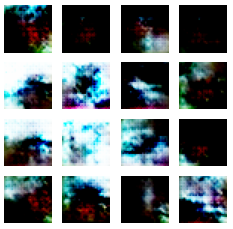

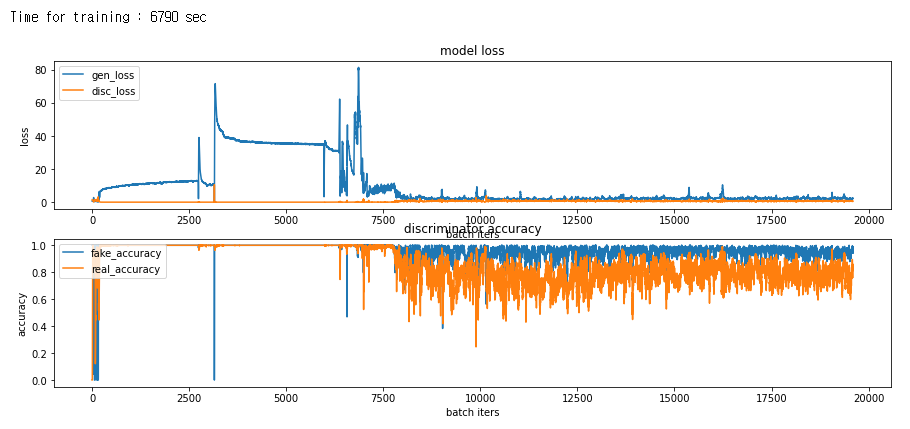

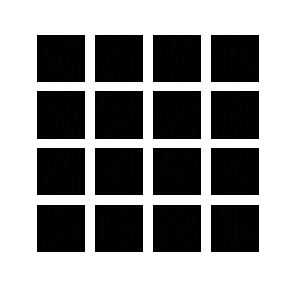

### 💙 초기 모델 하이퍼 파라미터 💙

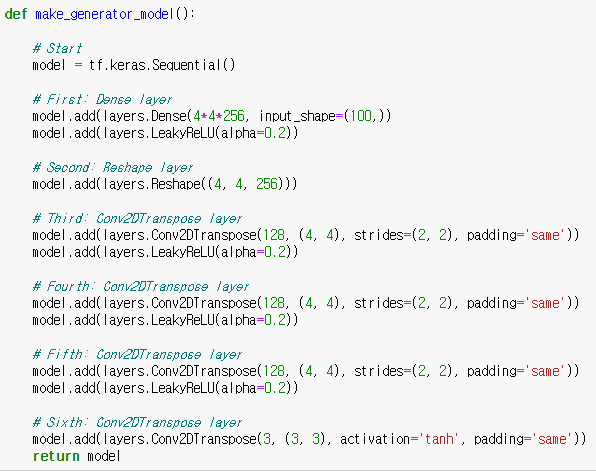

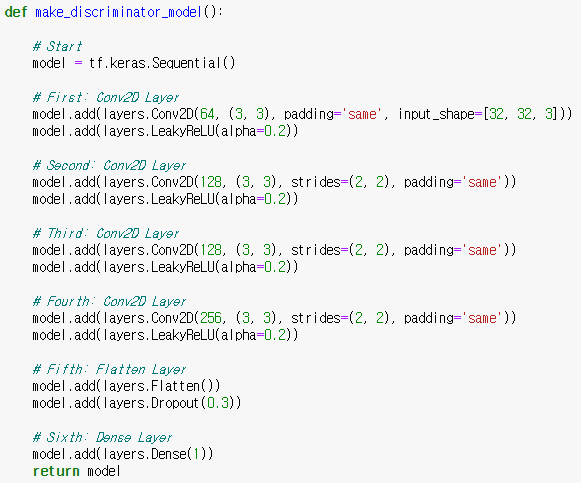

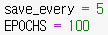

### 💛 수정하는 하이퍼 파라미터 💛

- 판별자 모델의 flatten layer dropout 수치 0.3 → 0.1로 조정
- EPOCHS 횟수는 그대로 유지
- save_every 수치는 5 → 10으로 조정
- **긴급 : 하이퍼 파라미터 변경 후 다시 동작하는 과정에서 생성자부터 구문 오류 발생으로 작동되지 않는 문제가 생겨 중단한다.. ㅠㅠㅠㅠㅠㅠ**

## 10. 프로젝트 회고

- 평균적으로 1 epoch 당 학습에 걸리는 시간이 대략 1분 정도 소요가 되어 대충 1시간 30분이 넘게 GAN 학습이 진행 되었습니다.
- 한 epoch 학습할 때마다 꽤 시간을 할애해야 했고, 최소 50 epoch 이상을 시도해야 했다는 점, 훈련 과정 개선 시도 과정에서 전혀 예상하지 못한 구문 오류 등으로 문제점을 찾아 프로젝트를 성공시키기에는 턱없이 부족한 시간이었습니다 ㅠㅠ
- 이번 프로젝트가 AIFFEL 프로젝트 중에서 가장 어려웠던 노드였고.. 질풍노드를 필수로 들어야 할 것 같습니다 ㅠㅠ 시간을 내서라도 이번 노드에 대한 질풍노드는 꼭 참여해서 해결하지 못한 문제를 꼭 풀고 싶습니다..